In [1]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Flatten, Dense, Lambda
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
#from keras.layers.core import Dense, Dropout, Flatten, Activation
#from tensorflow.keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
#from tensorflow.keras.utils import np_utils
import os
import numpy as np
from tqdm import tqdm 
import tensorflow as tf
from tensorflow.keras import layers

In [9]:
from tensorflow.keras.models import Model, load_model
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import efficientnet.tfkeras as efn 
from tensorflow.keras.models import Model, load_model
model_a = load_model('efficientnet_0.001.h5')   #0.001
model_b = load_model('efficientnet_0.01.h5')   #0.01
model_c = load_model('efficientnet_0.0008.h5')   #0.0008

In [10]:
##  Take out the horizontal and vertical coordinate position of patch in wsi from the naming, which is convenient for drawing.

import os
def get_data(dir_path):
    P = []
    X = []
    Y = []
    for file in tqdm(os.listdir(dir_path)):
        image = load_img(dir_path + '/' + file,target_size=(256,256))
        image = img_to_array(image)
        image /= 255
        P.append(image)
        x = file.split('.')[0].split('_')[-2]   ##  a patch named as 18-14705_20_67.png，take out the horizontal coordinate position '20'
        y = file.split('.')[0].split('_')[-1]   ##  a patch named as 18-14705_20_67.png，take out the vertical coordinate position '67'
        X.append(int(x))
        Y.append(int(y))
    P = np.asarray(P)   
    return X,Y,P

In [ ]:
######     Calculate the PPS of each patient and draw a panoramic distribution map of wsi

In [ ]:
######     examples of external validation patients

100%|██████████| 656/656 [00:38<00:00, 17.03it/s]


0.6626951


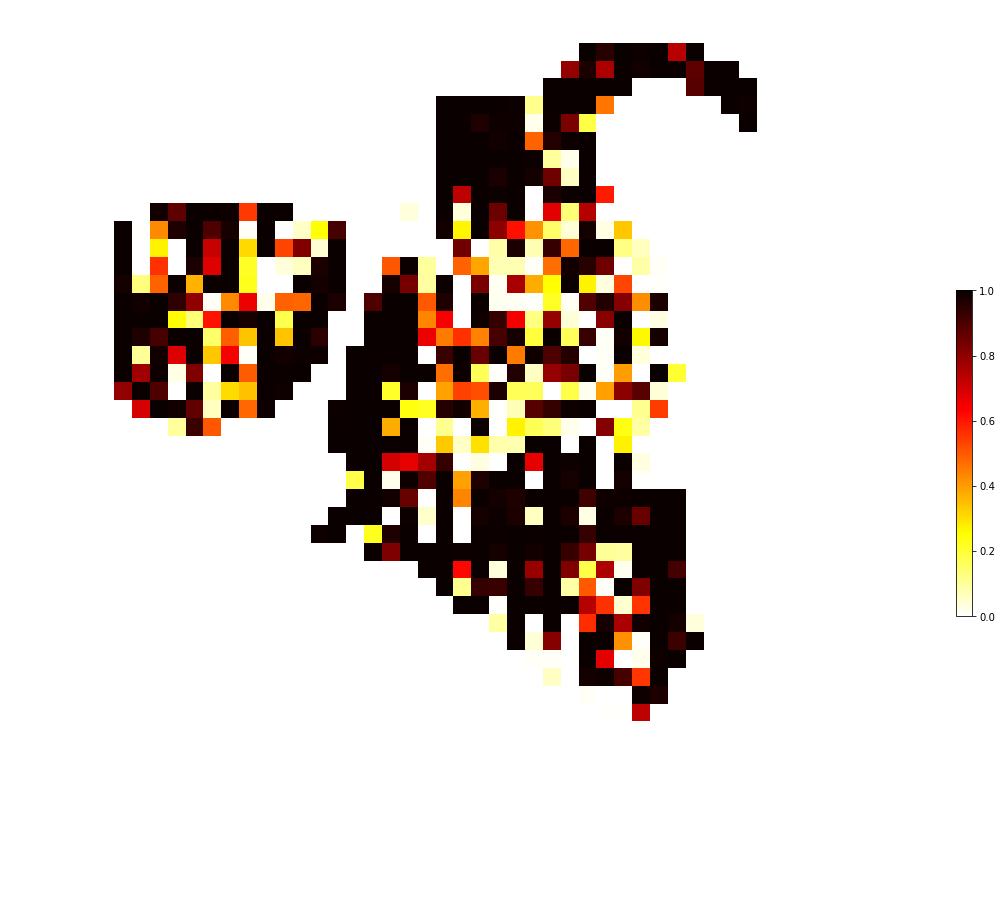

In [48]:
dir_path =  '/media/koalary/Backup Plus/external/17BX244942020-12-18/'
x,y,test_image = get_data(dir_path)
Y_pred = (model_a.predict(test_image) + model_a.predict(test_image) + model_a.predict(test_image)) / 3   ###  Obtain the predicted value of the ensemble model
Label = []
Value = []

aa = np.zeros((50,50))
bb = np.zeros((50,50))

for i in range(len(Y_pred)):
    Value.append(Y_pred[i][1])  ## uc
    bb[x[i], y[i]] = Value[i]   ## The probability of each patch, 0 is controlled, 1 is uncontrolled
    
print(np.mean(Value))    ##   For the average probability of all patches of one wsi, 0 is controlled and 1 is uncontrolled. Usually one wsi per patient.

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context({"figure.figsize":(20,20)})

import matplotlib.pyplot as plt
plt.imshow(bb.T, cmap='hot_r')  
plt.colorbar(shrink=0.3)
plt.axis('off')
plt.show() 

100%|██████████| 1023/1023 [01:03<00:00, 16.12it/s]


0.85713834


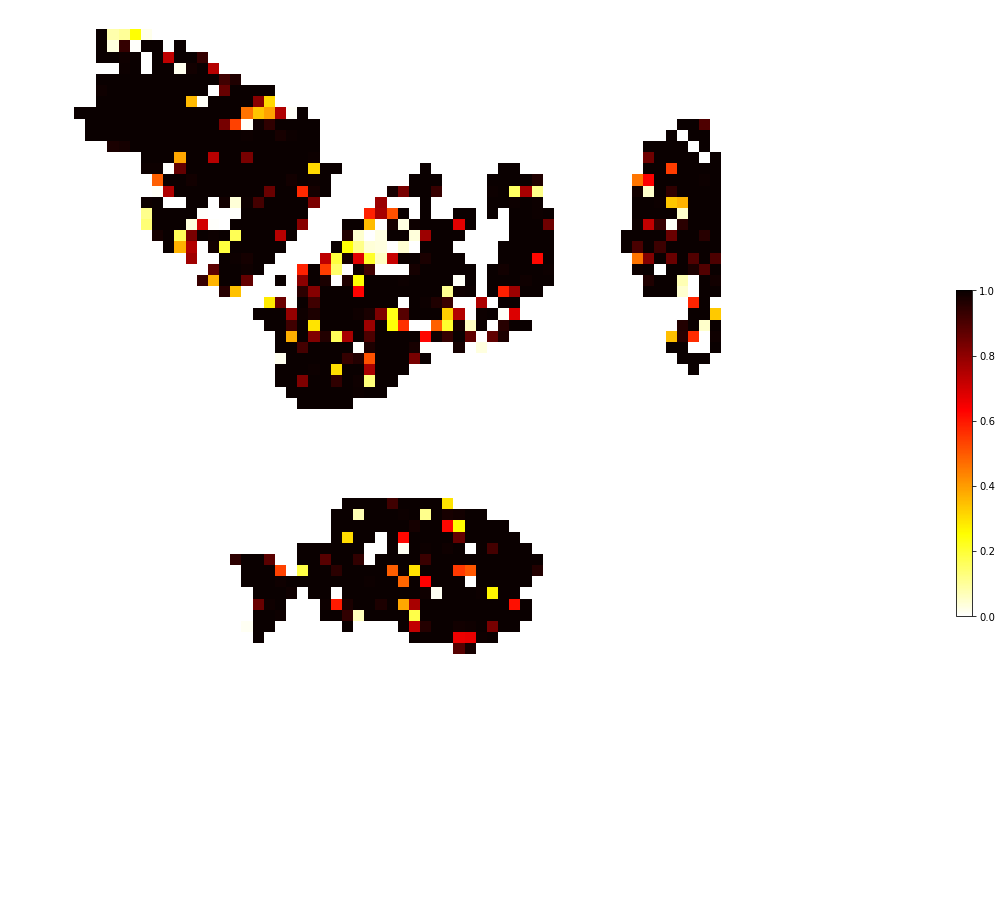

In [53]:
dir_path =  '/media/koalary/Backup Plus/external/18BX209822020-12-18_13_58_24/'
x,y,test_image = get_data(dir_path)
Y_pred = (model_a.predict(test_image) + model_a.predict(test_image) + model_a.predict(test_image)) / 3   ###  Obtain the predicted value of the ensemble model
Label = []
Value = []

aa = np.zeros((50,50))
bb = np.zeros((50,50))

for i in range(len(Y_pred)):
    Value.append(Y_pred[i][1])  ## uc
    bb[x[i], y[i]] = Value[i]   ## The probability of each patch, 0 is controlled, 1 is uncontrolled
    
print(np.mean(Value))    ##   For the average probability of all patches of one wsi, 0 is controlled and 1 is uncontrolled. Usually one wsi per patient.

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context({"figure.figsize":(20,20)})

import matplotlib.pyplot as plt
plt.imshow(bb.T, cmap='hot_r')  
plt.colorbar(shrink=0.3)
plt.axis('off')
plt.show() 

100%|██████████| 1444/1444 [01:26<00:00, 16.75it/s]


0.47902706


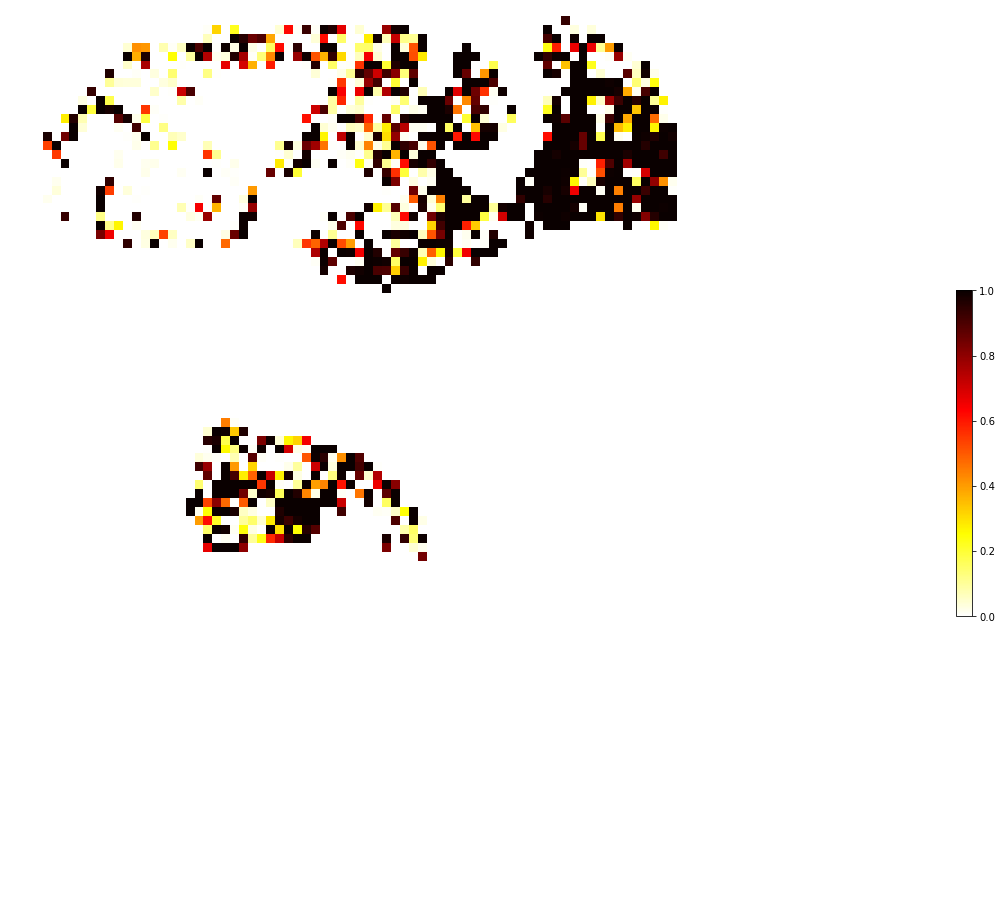

In [58]:
dir_path =  '/media/koalary/Backup Plus/external/18BX400222020-12-18_12_46_43/'
x,y,test_image = get_data(dir_path)
Y_pred = (model_a.predict(test_image) + model_a.predict(test_image) + model_a.predict(test_image)) / 3   ###  Obtain the predicted value of the ensemble model
Label = []
Value = []

aa = np.zeros((50,50))
bb = np.zeros((50,50))

for i in range(len(Y_pred)):
    Value.append(Y_pred[i][1])  ## uc
    bb[x[i], y[i]] = Value[i]   ## The probability of each patch, 0 is controlled, 1 is uncontrolled
    
print(np.mean(Value))    ##   For the average probability of all patches of one wsi, 0 is controlled and 1 is uncontrolled. Usually one wsi per patient.

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context({"figure.figsize":(20,20)})

import matplotlib.pyplot as plt
plt.imshow(bb.T, cmap='hot_r')  
plt.colorbar(shrink=0.3)
plt.axis('off')
plt.show() 

100%|██████████| 192/192 [00:11<00:00, 16.71it/s]


0.36679402


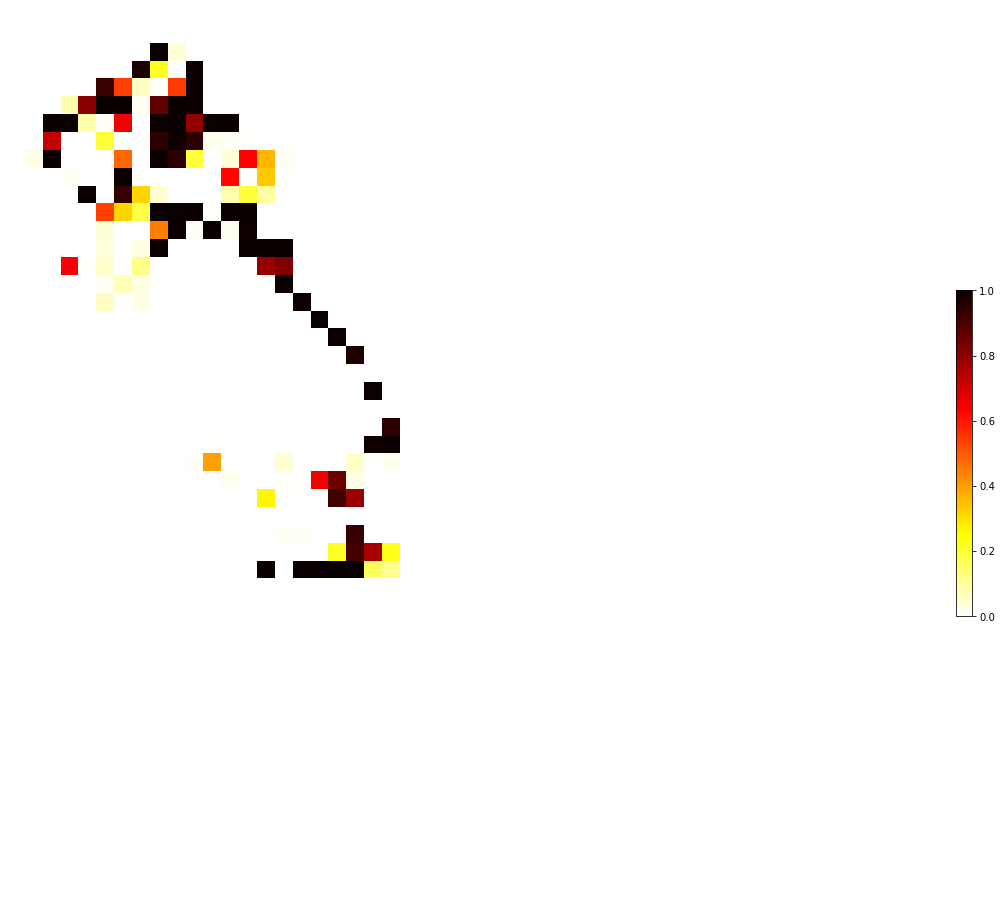

In [62]:
dir_path =  '/media/koalary/Backup Plus/external/119BX159112020-12-18_11_55_28/'
x,y,test_image = get_data(dir_path)
Y_pred = (model_a.predict(test_image) + model_a.predict(test_image) + model_a.predict(test_image)) / 3   ###  Obtain the predicted value of the ensemble model
Label = []
Value = []

aa = np.zeros((50,50))
bb = np.zeros((50,50))

for i in range(len(Y_pred)):
    Value.append(Y_pred[i][1])  ## uc
    bb[x[i], y[i]] = Value[i]   ## The probability of each patch, 0 is controlled, 1 is uncontrolled
    
print(np.mean(Value))    ##   For the average probability of all patches of one wsi, 0 is controlled and 1 is uncontrolled. Usually one wsi per patient.

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context({"figure.figsize":(20,20)})

import matplotlib.pyplot as plt
plt.imshow(bb.T, cmap='hot_r')  
plt.colorbar(shrink=0.3)
plt.axis('off')
plt.show() 

In [ ]:
###   patients level
###   Performance comparison between the ControlNet and tissue eosinophil marker for predicting treatment outcome of NP patients on the external validation cohort. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['savefig.dpi'] = 500
plt.rcParams['figure.dpi'] = 500

In [2]:
###  pps C vs NC

In [3]:
##  true lable, 0 is controlled and 1 is uncontrolled.
y_test = [0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
0,
1
]
##  predicted value
y_pred = [0.16,
0.57,
0.47,
0.51,
0.46,
0.09,
0.16,
0.31,
0.22,
0.19,
0.26,
0.25,
0.06,
0.2,
0.61,
0.15,
0.29,
0.21,
0.53,
0.33,
0.26,
0.34,
0.23,
0.16,
0.41,
0.05,
0.43,
0.44,
0.56,
0.11,
0.33,
0.21,
0.66,
0.53,
0.32,
0.39,
0.24,
0.67,
0.66,
0.74,
0.86,
0.95,
0.73,
0.48,
0.59,
0.51,
0.59,
0.57,
0.85,
0.94,
0.89,
0.66,
0.57,
0.72,
0.69,
0.51,
0.61,
0.94,
0.66,
0.74,
0.86,
0.95,
0.73,
0.48,
0.59,
0.51,
0.59,
0.57,
0.85,
0.94,
0.89,
0.66,
0.57,
0.72,
0.69,
0.7,
0.2,
0.4
]

In [4]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

ROC area is 0.9434582511505588


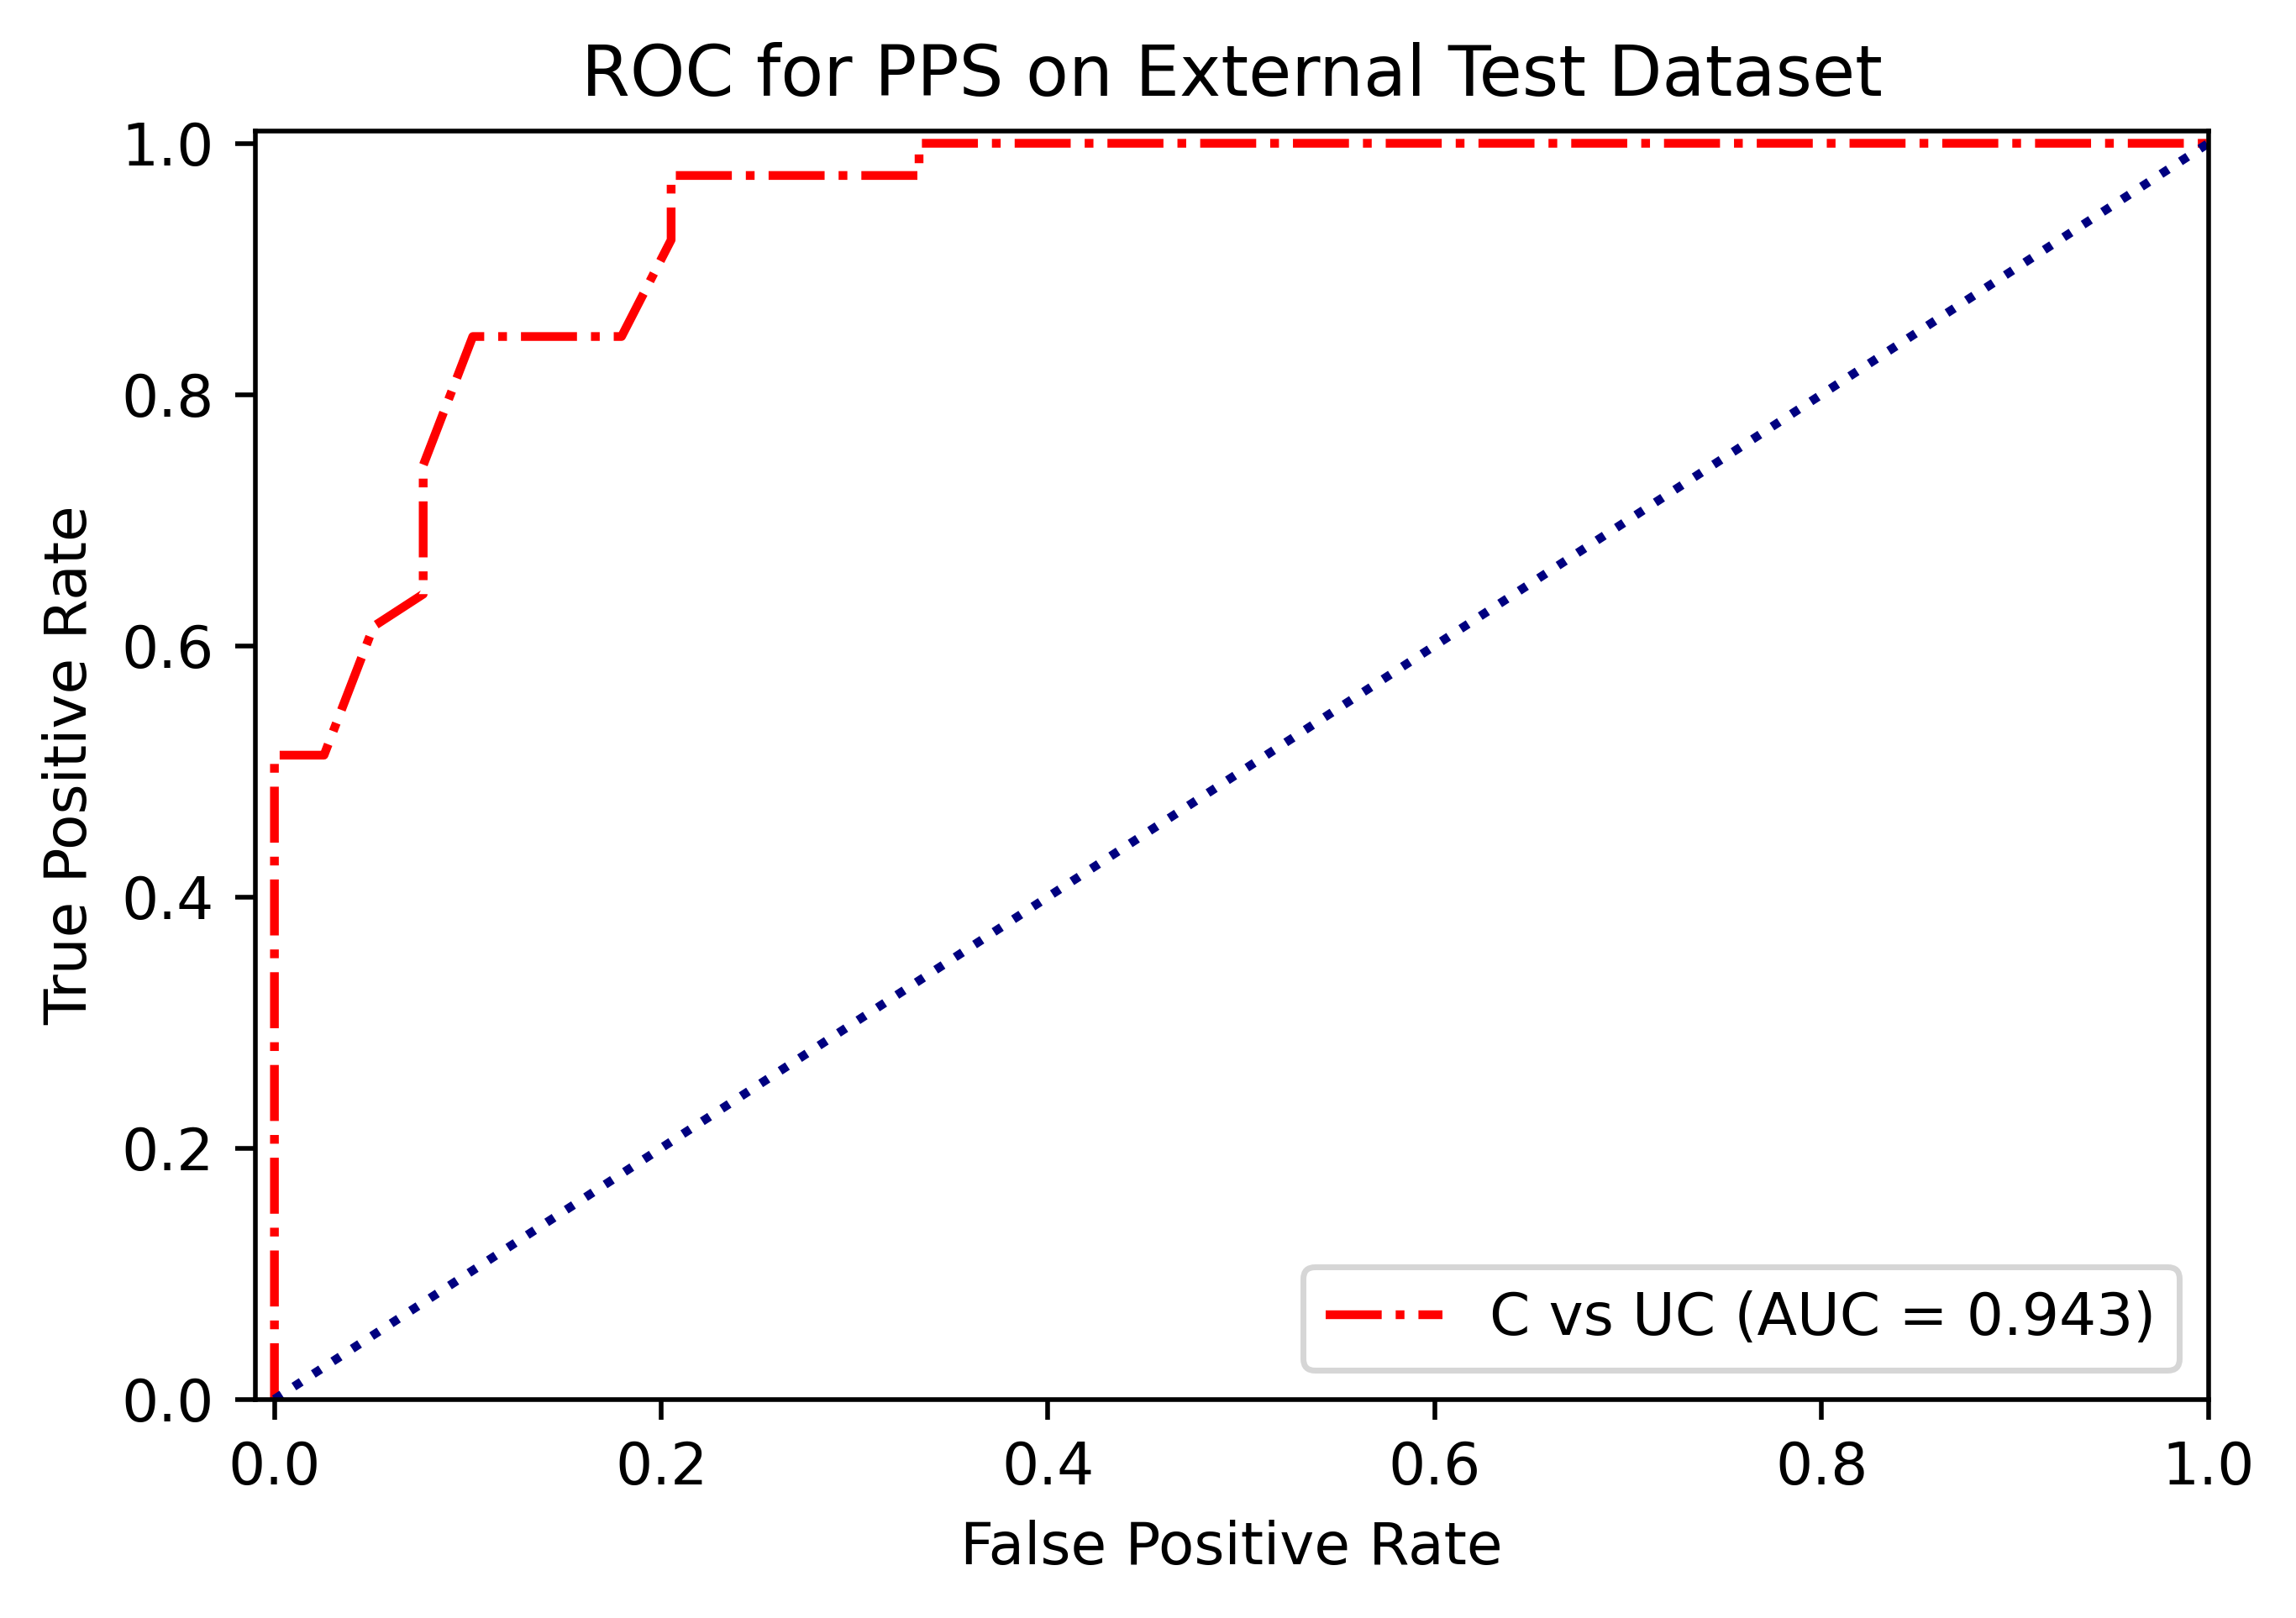

In [5]:
plt.figure()
plt.plot(fpr, tpr, color='red', linestyle='-.',label='C vs UC (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle=':')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for PPS on External Test Dataset')
plt.legend(loc="lower right")

In [7]:
maxindex = (tpr-fpr).tolist().index(max(tpr-fpr))
threshold = thresholds[maxindex]
threshold

0.48

In [8]:
max(tpr-fpr)

0.7692307692307692

<ipython-input-10-22b0611adc8c>:18: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.scatter(0.48,0.76947,marker = 'o',s = 100,color = '',edgecolor='red')


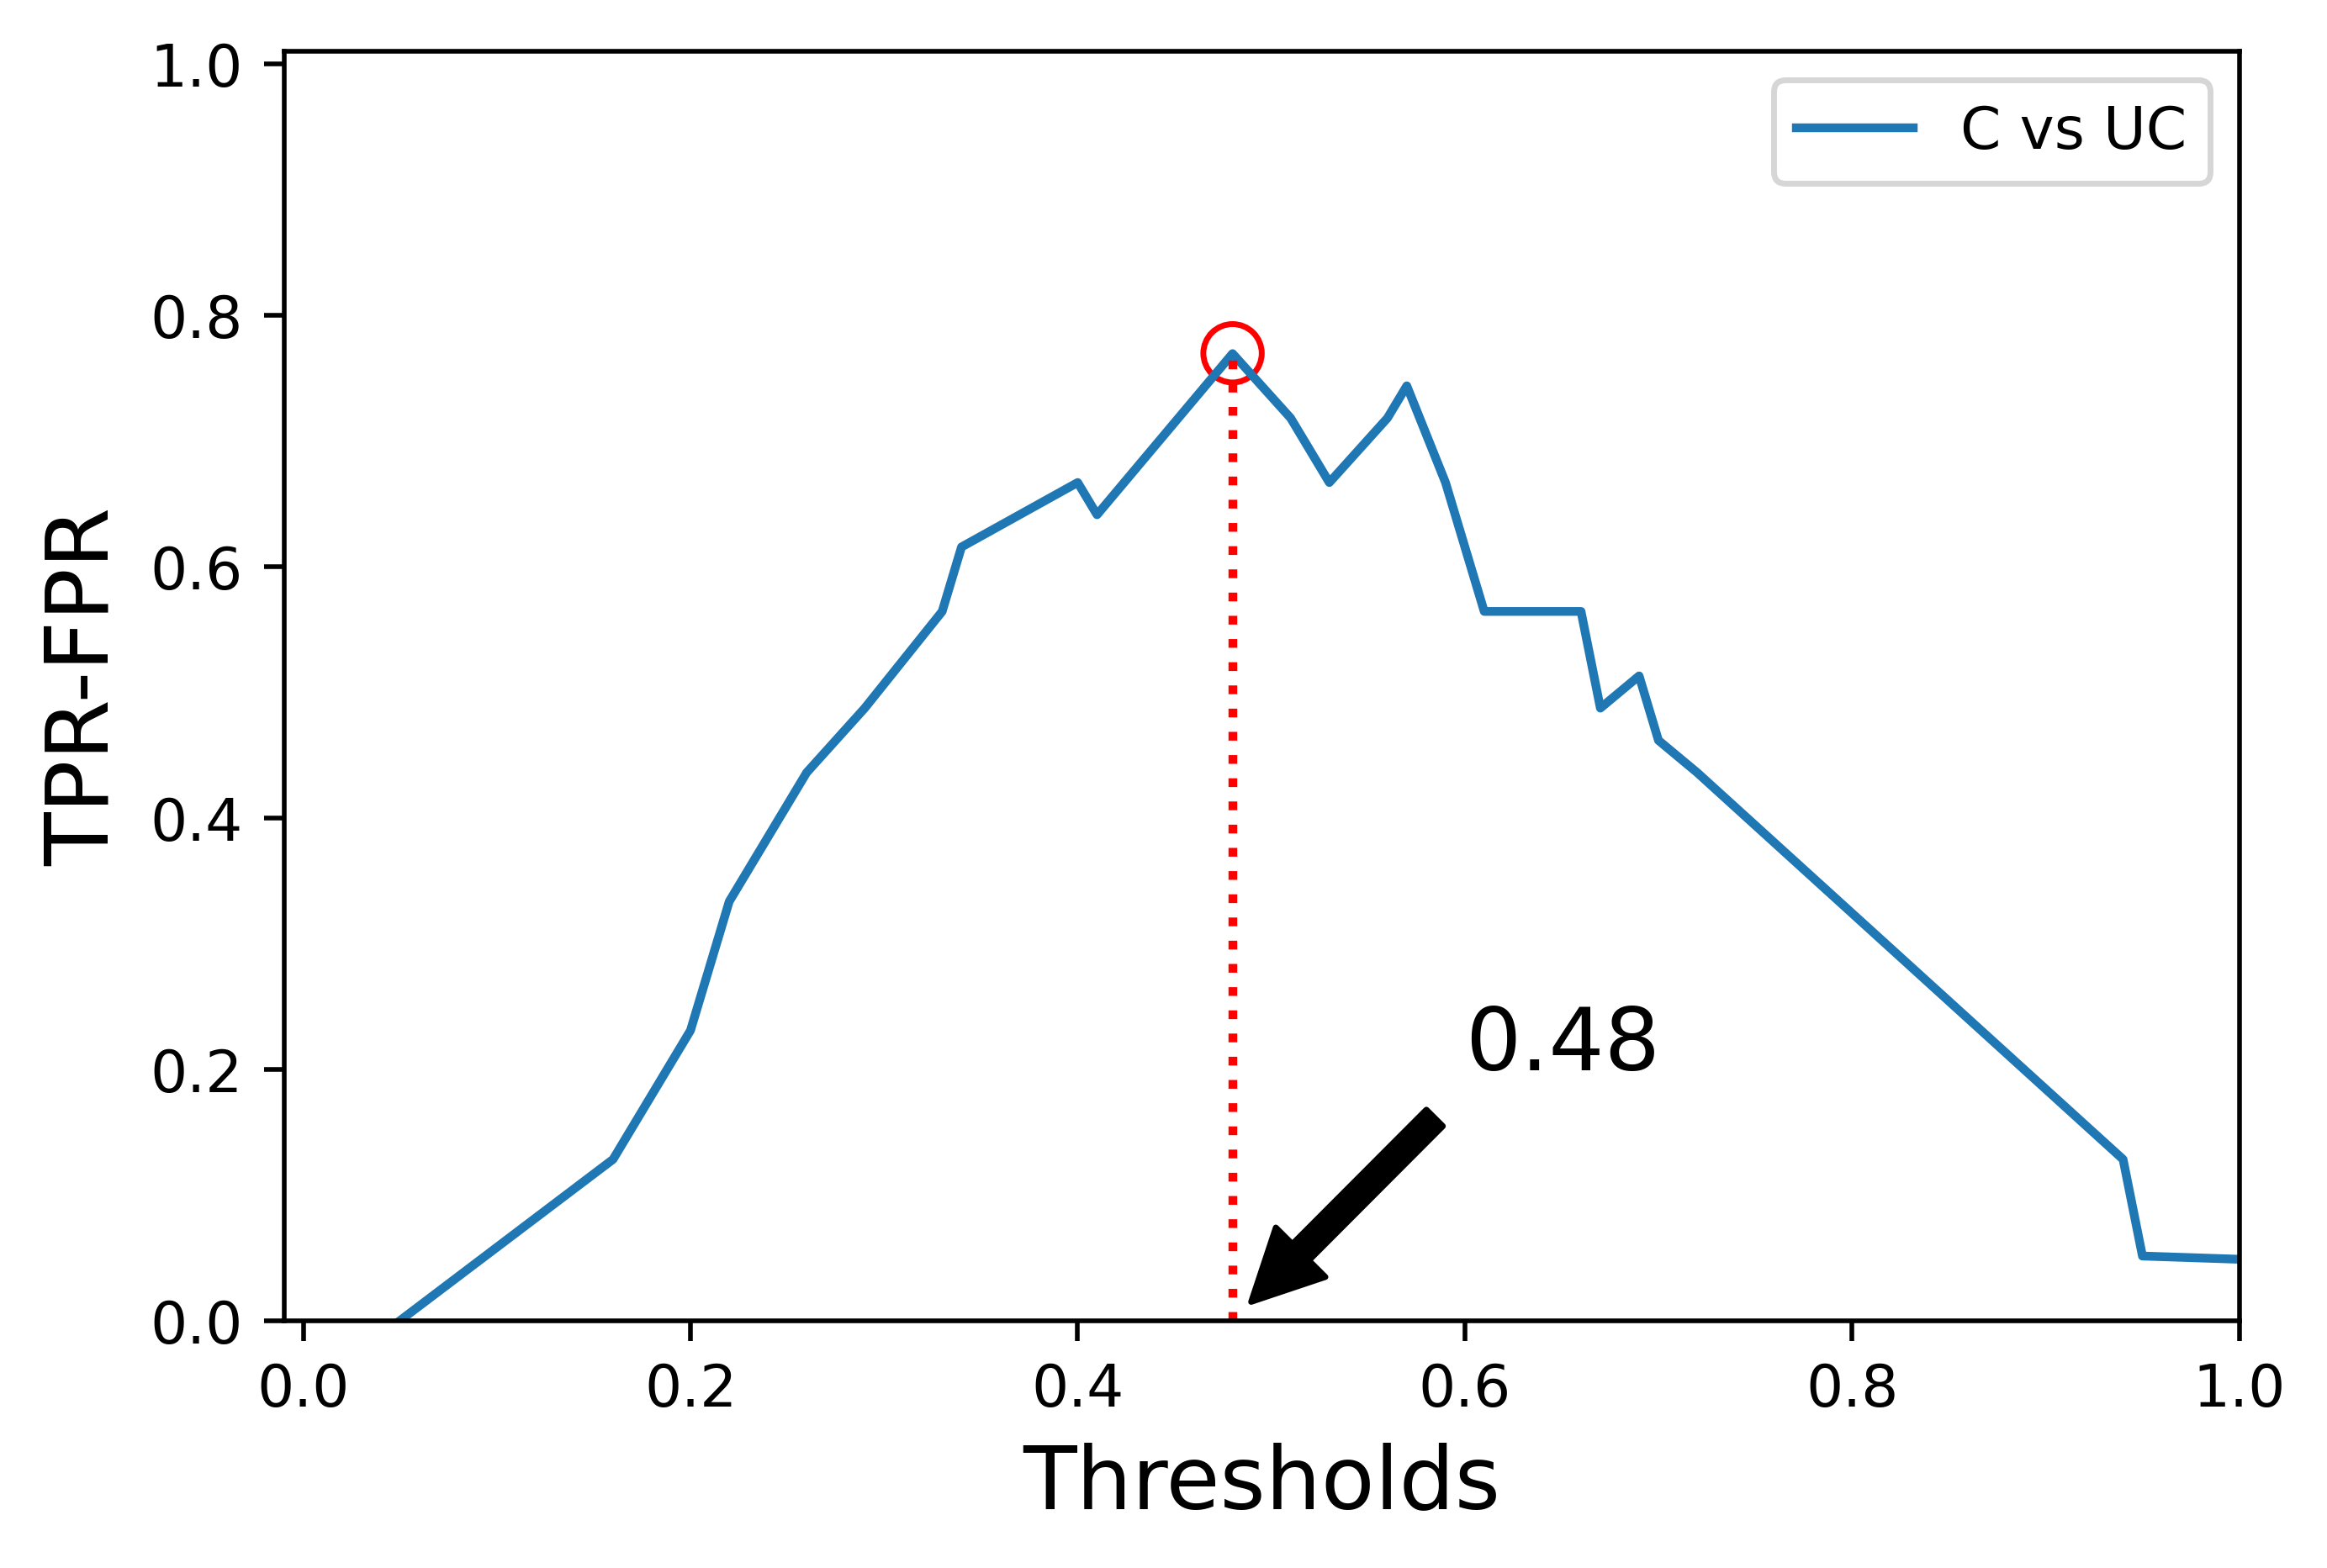

In [10]:
a = (tpr-fpr).tolist()
b = thresholds.tolist()
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['figure.dpi'] = 500
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(b,a,label = 'C vs UC')
ax.annotate('0.48',xy=(0.48,0), xytext=(0.6,0.2),arrowprops=dict(facecolor='black',shrink=0.08),fontsize=15)
plt.xlim([-0.01, 1.0])
plt.ylim([0, 1.01])

ax.plot([0.48, 0.48], [0, 0.76947], color='red', linestyle=':')
ax.scatter(0.48,0.76947,marker = 'o',s = 100,color = '',edgecolor='red')
plt.xlabel('Thresholds',fontsize=15)
plt.ylabel('TPR-FPR',fontsize=15)
#plt.title('ROC on Test Dataset')
plt.legend(loc="best")

In [ ]:
### EOS

0.7011834319526626


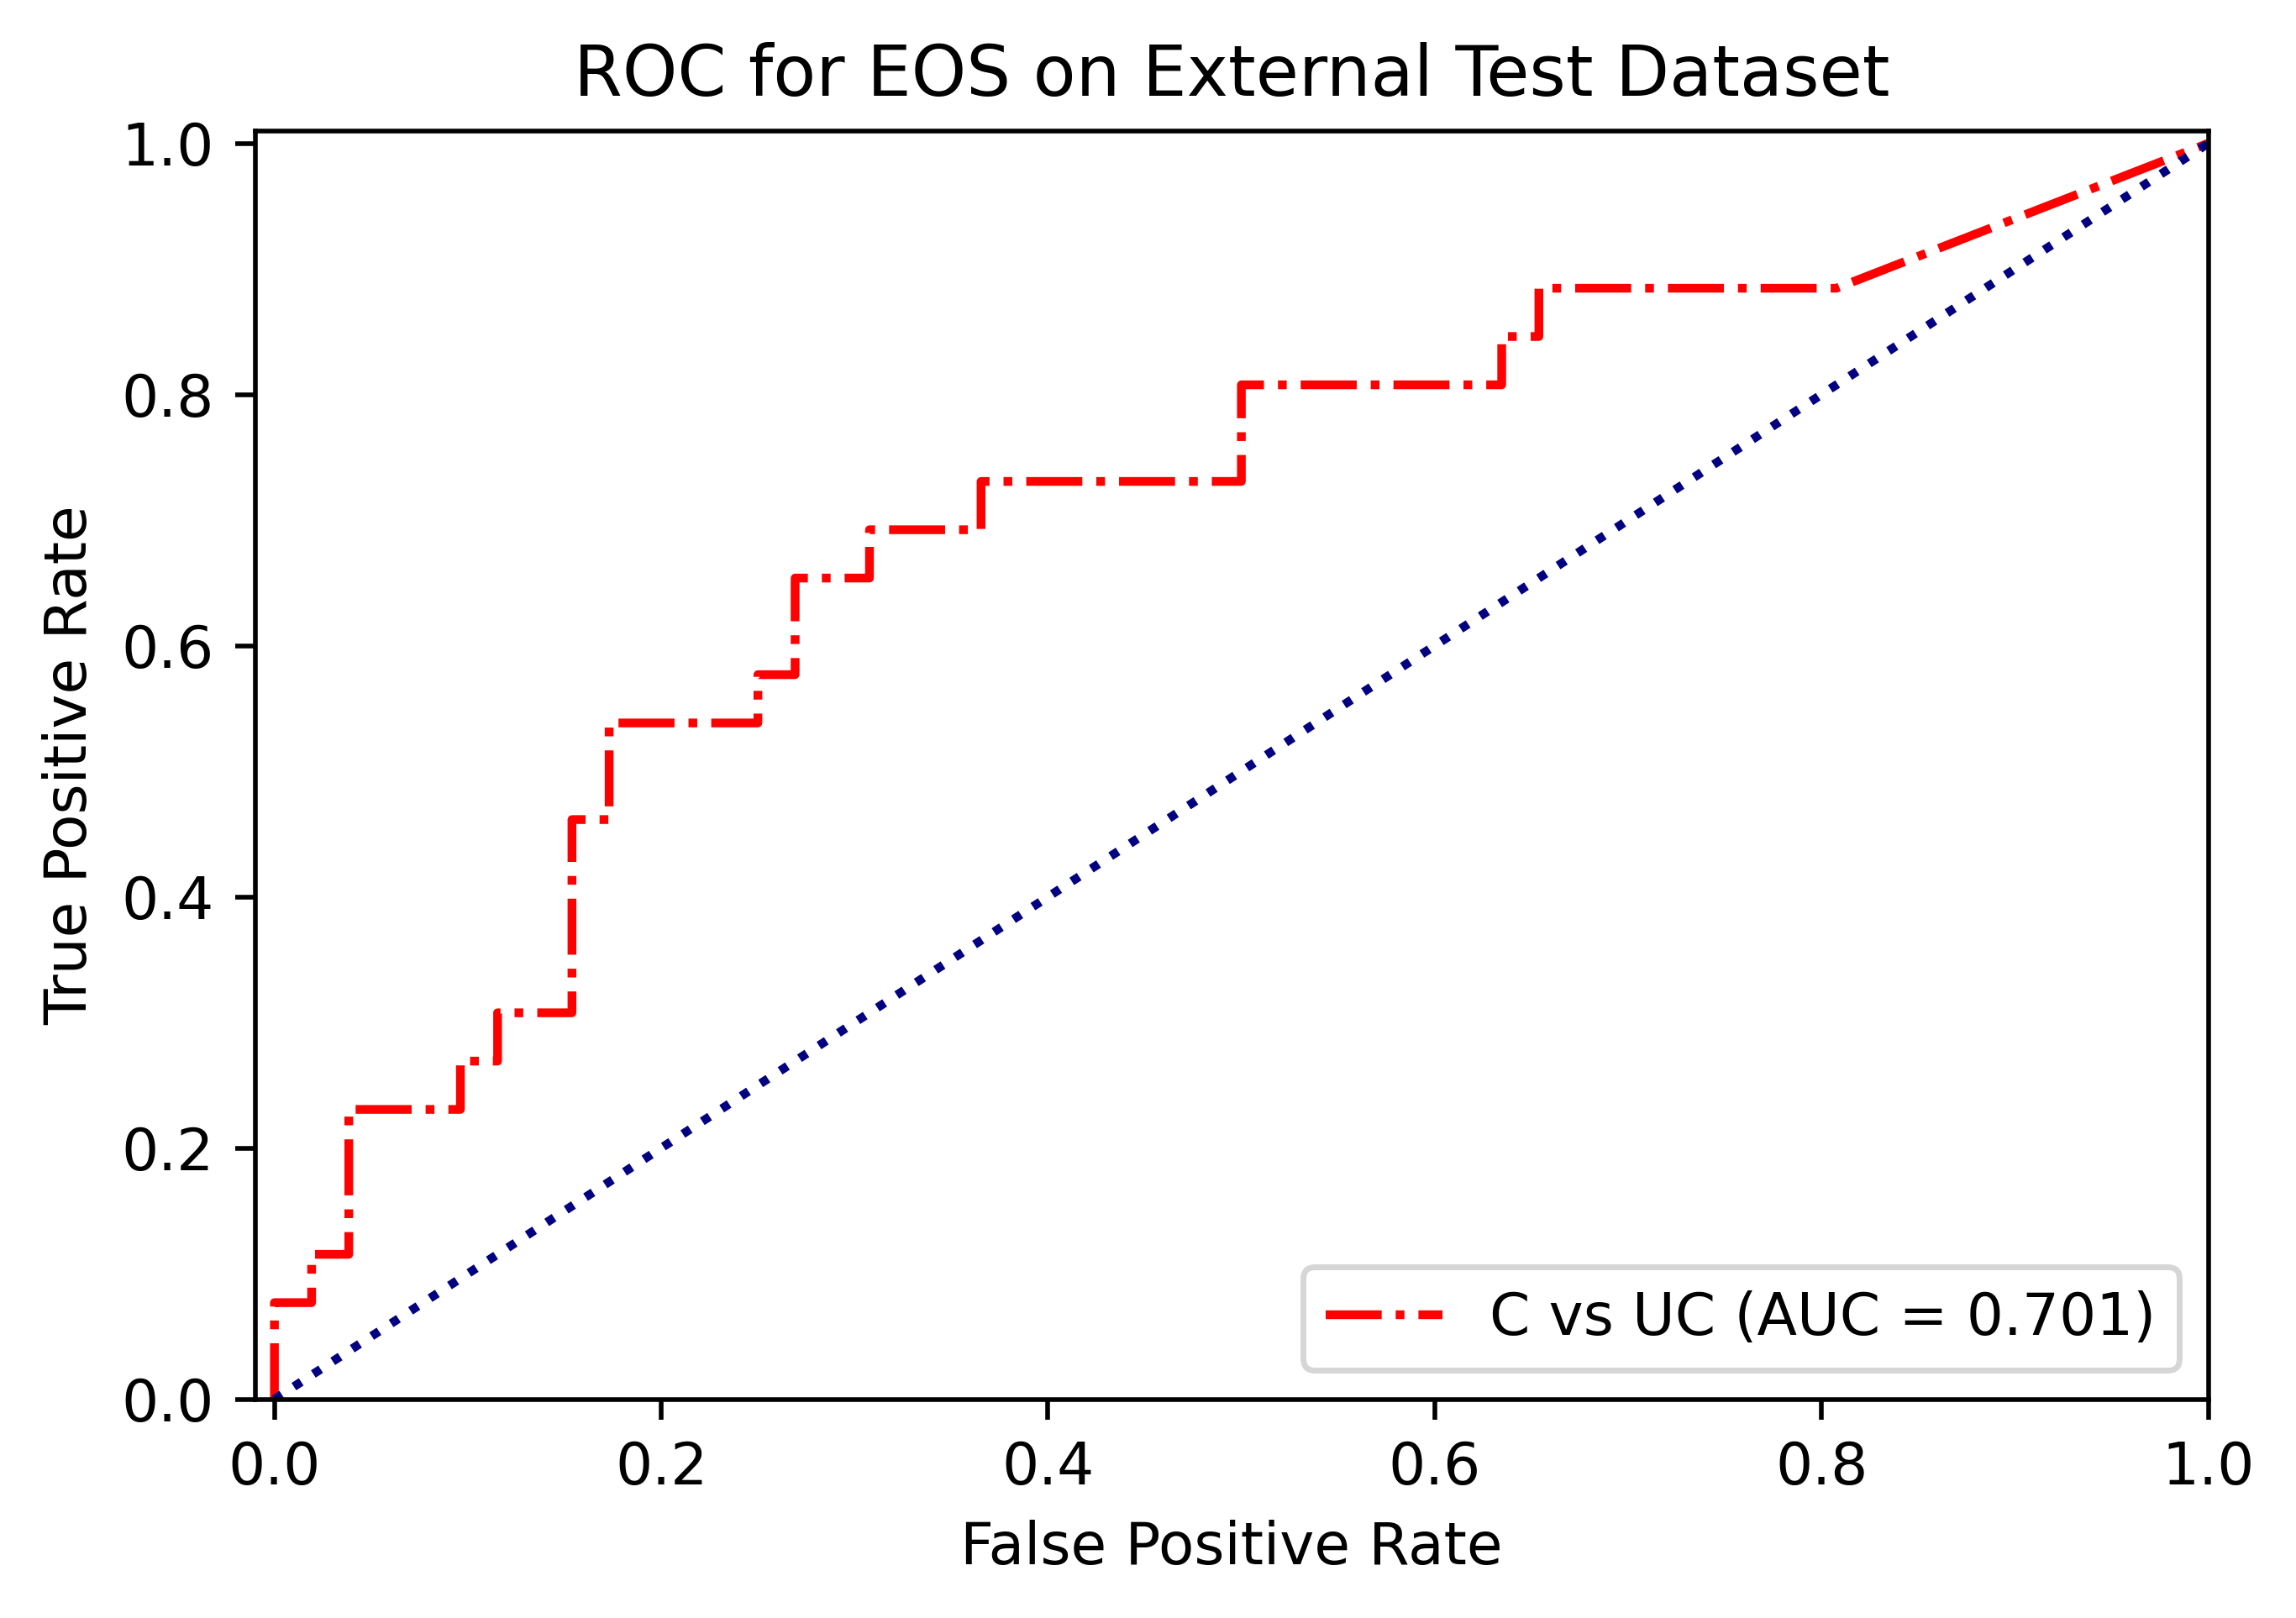

In [12]:
from sklearn import metrics
import matplotlib.pylab as plt
 
#true lable,0 is controlled and 1 is uncontrolled.
GTlist = [0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1
]
#predicted value
Problist = [0.615873016,
0,
0.135458167,
0.317961165,
0.001808318,
0.017632242,
0.074303406,
0.632398754,
0.006355932,
0.053658537,
0.002754821,
0.079365079,
0.046153846,
0.016666667,
0.036764706,
0.006666667,
0.021696252,
0.184035477,
0.055737705,
0.047169811,
0.014084507,
0.041152263,
0.101265823,
0.00530504,
0.007462687,
0,
0,
0.049,
0.093425606,
0,
0.069444444,
0.153846154,
0.002688172,
0,
0.608796296,
0.003333333,
0,
0,
0.647058824,
0.844036697,
0,
0,
0.486754967,
0.020833333,
0.427672956,
0.008,
0,
0.09039548,
0.017241379,
0.219565217,
0.015,
0.678,
0.360294118,
0.611044418,
0.807917889,
0.392857143,
0.854014599,
0.293963255,
0.667560322,
0.897035881,
0.673282443,
0.425149701,
0.548245614,
0.012779553,
0.025735294,
0.007751938,
0.65,
0.095490716,
0.095041322,
0.081081081,
0.131428571,
0.225806452,
0.37745098,
0,
0.060869565,
0,
0,
0.036082474
]
 
 
fpr3, tpr3, thresholds3 = metrics.roc_curve(GTlist, Problist, pos_label=1)
roc_auc3 = metrics.auc(fpr3, tpr3) 
print(roc_auc3)
 
 
plt.figure()
plt.plot(fpr3, tpr3, color='red', linestyle='-.',label='C vs UC (AUC = %0.3f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', linestyle=':')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for EOS on External Test Dataset')
plt.legend(loc="lower right")

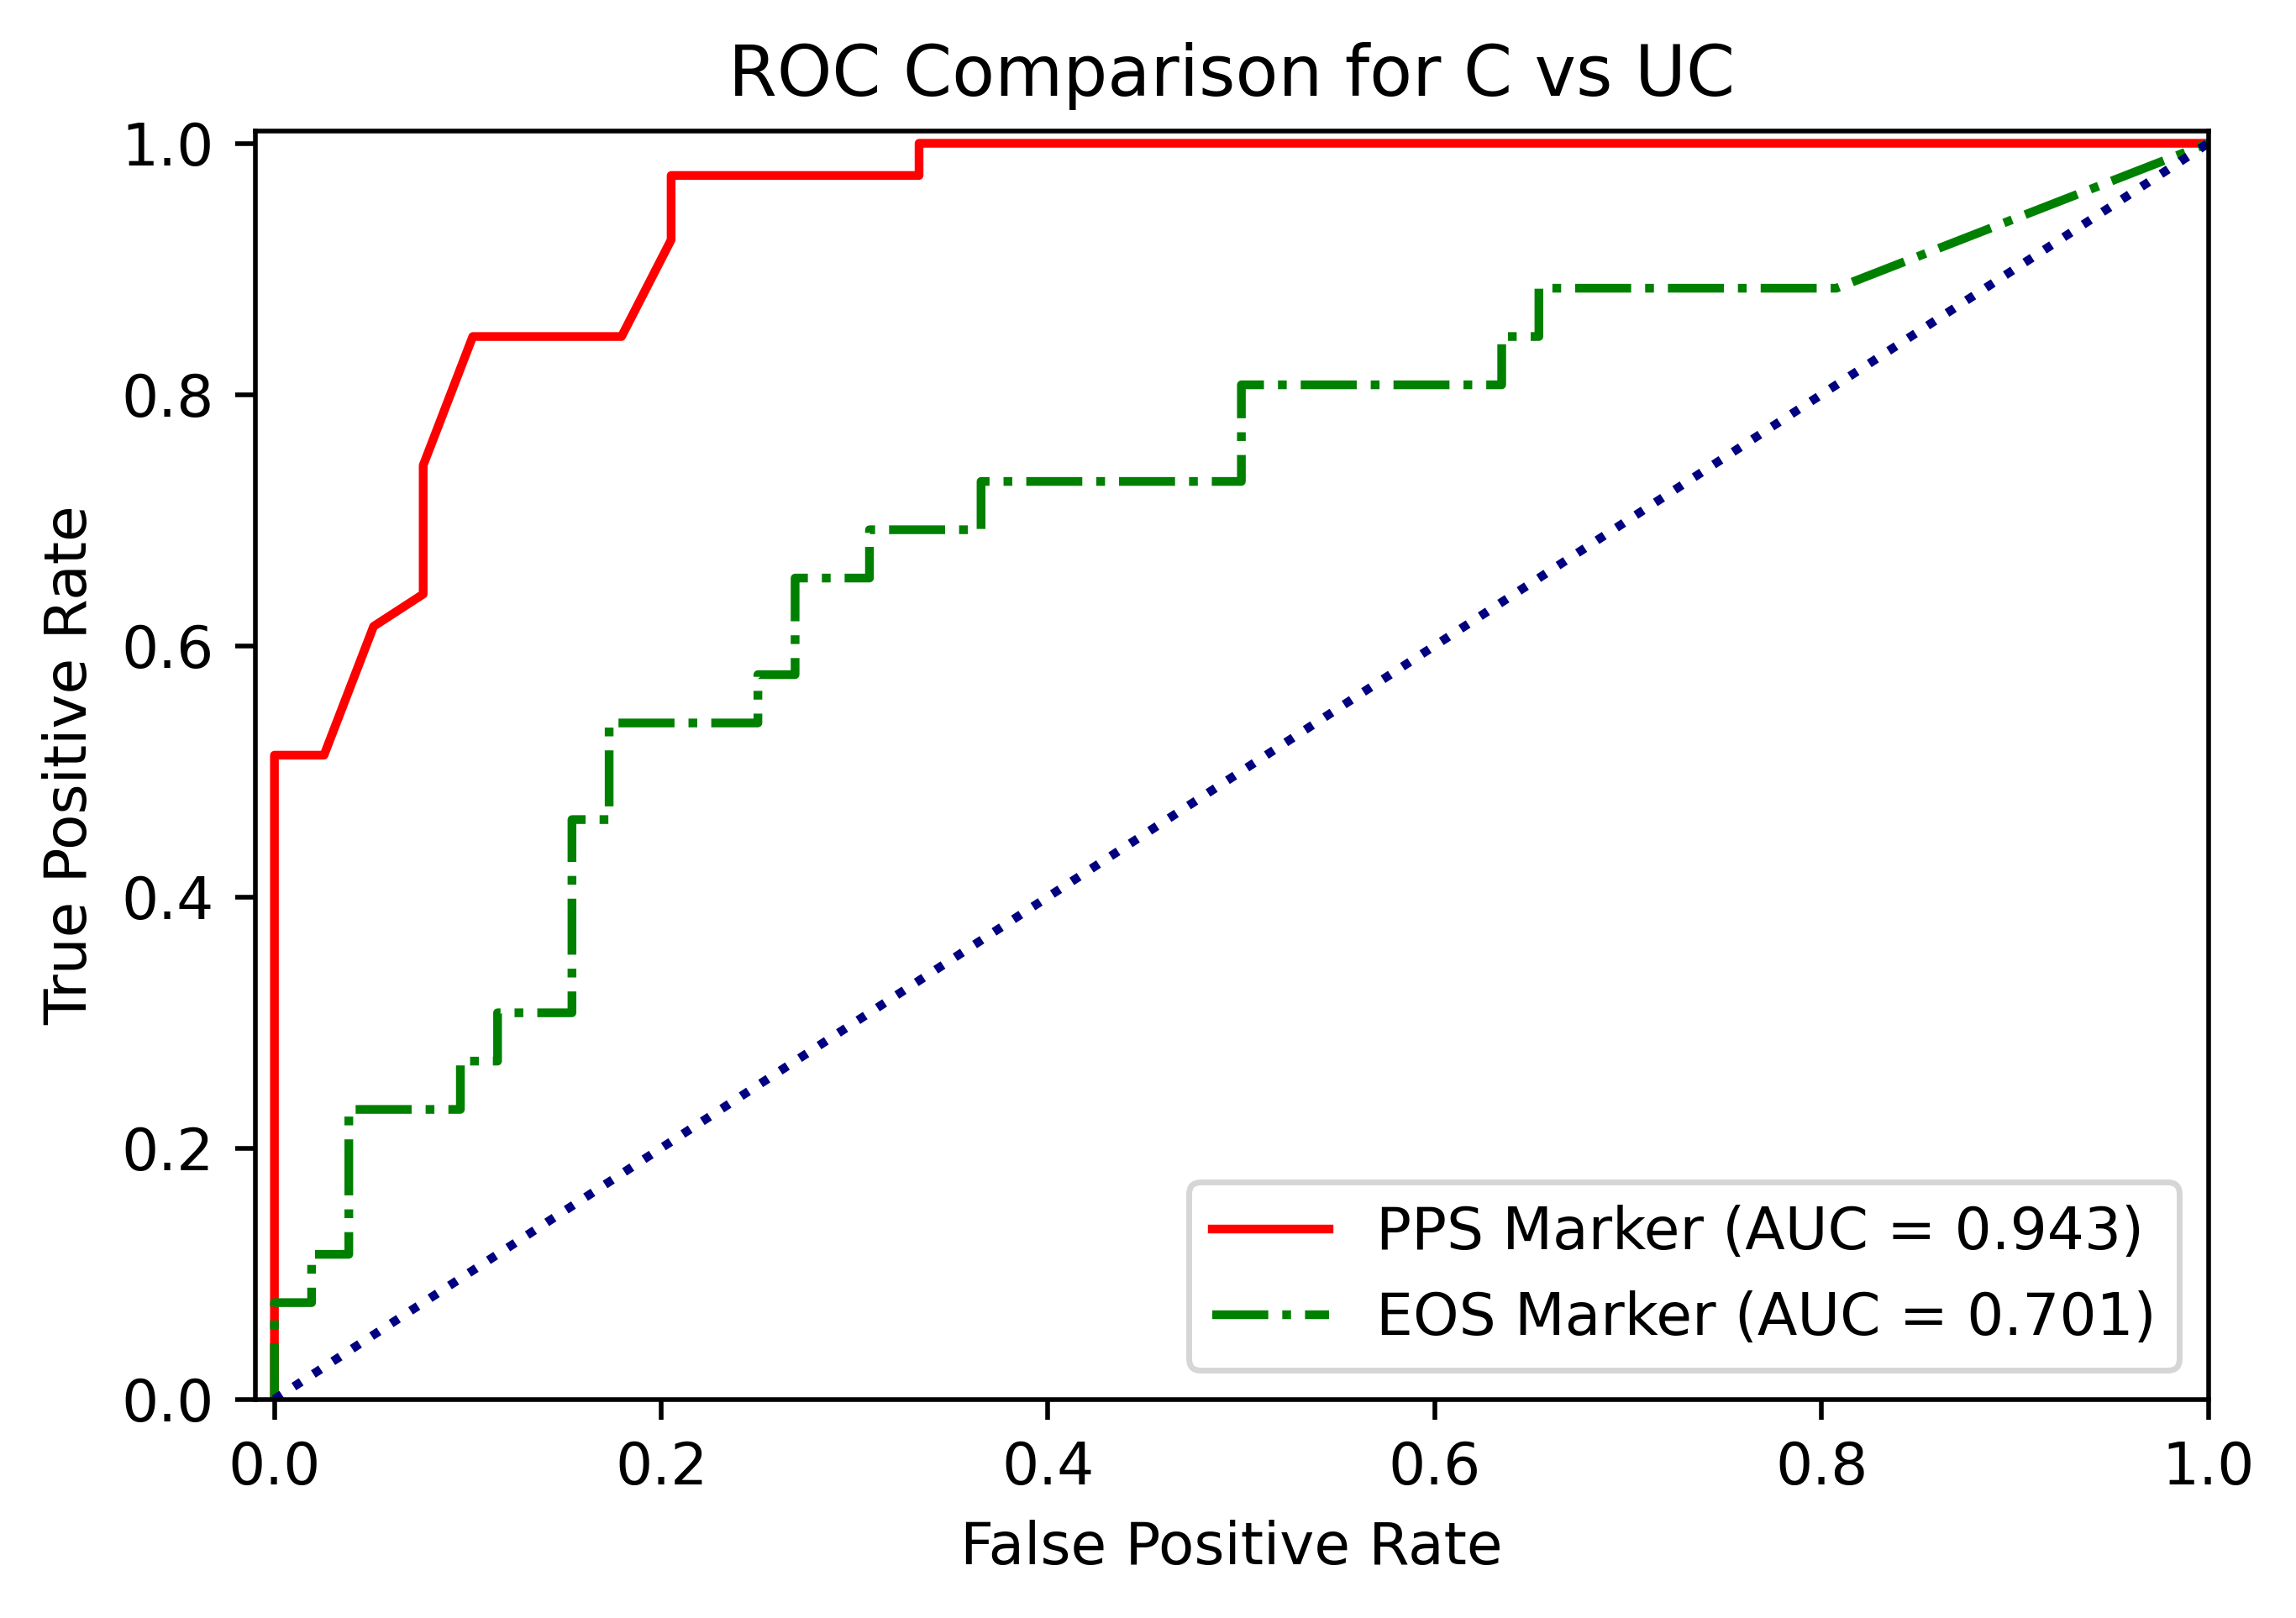

In [13]:
plt.figure()
plt.plot(fpr, tpr, color='red', linestyle='-',label='PPS Marker (AUC = %0.3f)' % roc_auc)
plt.plot(fpr3, tpr3, color='green',linestyle='-.', label='EOS Marker (AUC = %0.3f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', linestyle=':')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Comparison for C vs UC')
plt.legend(loc="lower right")